# Quadranten erkennen & zwei Bilder generieren

In [8]:
import cv2
import numpy as np
from datetime import datetime
import time

__max = {
    0: 0,
    1: 0,
    2: 0
}

# Function to check if a pixel is white
def is_white(pixel):
    return all(value > 160 for value in pixel)

def wait_approx_11_5_seconds():
    # Define the number of iterations for the delay
    num_iterations = 115000000  # Adjust the number of iterations for your approximation
    
    # Execute a loop to wait for the specified number of iterations
    for _ in range(num_iterations):
        pass

def get_max_pixel(ip_address,username, password, profile, frames):
    cap = cv2.VideoCapture('rtsp://' +
            username + ':' +
            password +
            '@' + ip_address + '/axis-media/media.amp' + '?streamprofile=' + profile)
    if cap is None or not cap.isOpened():
        print('Warning: unable to open video source: ', ip_address)
        return None
    frames_count = 0
    while frames_count < frames:
        ret, frame = cap.read()
        # Rechteck auf Bild zeichnen (zur Entwicklung)
        cv2.rectangle(frame, (360, 280), (640, 490), (0, 255, 0), 3) 
        roi = frame[280:490, 360:640]
        
        # Calculate the average color of the ROI
        average_color = np.mean(roi, axis=(0, 1))
        
        if(average_color[0] > __max[0]):
            __max[0] = average_color[0]
        if(average_color[1] > __max[1]):
            __max[1] = average_color[1]
        if(average_color[2] > __max[2]):
            __max[2] = average_color[2]
        print(__max)
        #cv2.imshow('frame',frame)
        frames_count = frames_count + 1
        print("Frames: " + str(frames_count))
        if not ret:
            print('Warning: unable to read next frame')
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    return __max

def open_camera_profile(ip_address, username, password, profile, maxcolor): # Open the camera
    cap = cv2.VideoCapture('rtsp://' +
            username + ':' +
            password +
            '@' + ip_address + '/axis-media/media.amp' + '?streamprofile=' + profile)
    if cap is None or not cap.isOpened():
        print('Warning: unable to open video source: ', ip_address)
        return None
    while True:
        ret, frame = cap.read()
        # Rechteck auf Bild zeichnen (zur Entwicklung)
        cv2.rectangle(frame, (360, 280), (640, 490), (0, 255, 0), 3) 
        roi = frame[280:490, 360:640]
        
        # Calculate the average color of the ROI
        average_color = np.mean(roi, axis=(0, 1))
        
        # Print the average color (BGR format)
        #print("Average color (BGR):", average_color)
        print(maxcolor)
        print("Average 0:",average_color[0])
        print("Average 1:", average_color[1])
        print("Average 2:", average_color[2])
        print("Rounded 0", round(maxcolor[0], 1))
        print("Rounded 1", round(maxcolor[1], 1))
        print("Rounded 2", round(maxcolor[2], 1))
        print("---")
        # If you want to convert the average color to RGB format
        if((average_color[0] > round(maxcolor[0] -2 , 1)) & (average_color[1] > round(maxcolor[1] -2, 1)) & (average_color[2] > round(maxcolor[2] -2, 1))):
            cap.release()
            return True
        # Zur Entwicklung: Frame anzeigen
        cv2.imshow('frame',frame)
        
        if not ret:
            print('Warning: unable to read next frame')
            break

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
        #cv2.destroyAllWindows()

def writeScreenshot(ip_address, username, password, profile, filename): 
    # Open the camera
    cap = cv2.VideoCapture('rtsp://' +
                            username + ':' +
                            password +
                            '@' + ip_address + '/axis-media/media.amp' + '?streamprofile=' + profile)
    if cap is None or not cap.isOpened():
        print('Warning: unable to open video source: ', ip_address) 
        return None
    ret, frame = cap.read()
    cv2.imwrite(filename, frame)
    cv2.destroyAllWindows()
    print(filename, "erstellt.")

max_color = get_max_pixel('147.88.48.131', 'pren', '463997','pren_profile_med', 600)
while(True):
    if(open_camera_profile('147.88.48.131', 'pren', '463997','pren_profile_med', max_color) == True):
        print("now")
        writeScreenshot('147.88.48.131', 'pren', '463997','pren_profile_med', 'Screenshot1.png')
        time.sleep(11)
        print("now")
        writeScreenshot('147.88.48.131', 'pren', '463997','pren_profile_med', 'Screenshot2.png')
        break

{0: 99.90363945578231, 1: 98.70986394557823, 2: 85.26673469387755}
Frames: 1
{0: 100.05142857142857, 1: 98.85222789115646, 2: 85.40229591836734}
Frames: 2
{0: 100.20039115646259, 1: 98.99824829931973, 2: 85.54205782312926}
Frames: 3
{0: 100.35091836734694, 1: 99.1295238095238, 2: 85.6754081632653}
Frames: 4
{0: 100.39457482993197, 1: 99.18515306122448, 2: 85.7275}
Frames: 5
{0: 100.45239795918367, 1: 99.23761904761905, 2: 85.78408163265306}
Frames: 6
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames: 7
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames: 8
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames: 9
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames: 10
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames: 11
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames: 12
{0: 100.50897959183673, 1: 99.29681972789116, 2: 85.85482993197279}
Frames

# Bilder bearbeiten

## Farbfilter

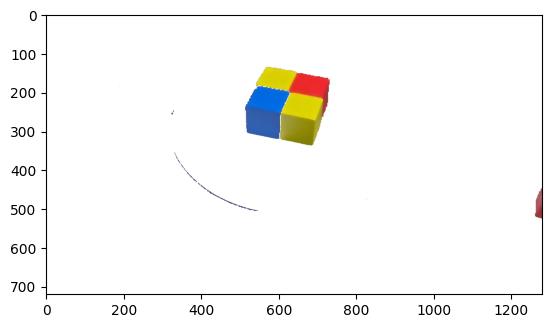

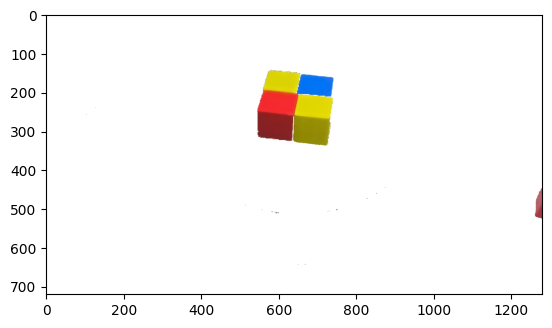

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # für RaspberryPi Code entfernen

def colorfilter(filename, colorfiltername):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    lower_red = np.array([0, 100, 110])
    upper_red = np.array([345, 255, 255])

    lower_blue = np.array([90, 95, 50])
    upper_blue = np.array([130, 255, 255])

    lower_yellow = np.array([25, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    red_mask = cv2.inRange(hsv, lower_red, upper_red)
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    final_mask = red_mask + blue_mask + yellow_mask
    filter = cv2.bitwise_and(img, img, mask = final_mask)

    gray_image = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY) #anpassen
    threshold = 10
    mask_black = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)[1]
    mask_white = cv2.bitwise_not(mask_black)
    img[mask_white == 255] = [255, 255, 255]
      
    bilateral = cv2.bilateralFilter(img, 15,100,100) #anpassen
    plt.imshow(bilateral) # für RaspberryPi Code entfernen
    plt.show() # für RaspberryPi Code entfernen

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bilateral = cv2.bilateralFilter(img, 15,100,100)
    cv2.imwrite(colorfiltername, bilateral)

colorfilter("Screenshot1.png", "ColorFilter1.png")
colorfilter("Screenshot2.png", "ColorFilter2.png")

## Tiefenkarte erstellen

In [7]:
import cv2

frame = cv2.imread("Screenshot2.png")
frame[0:720,0:545] = [255,255,255]
frame[0:720,745:1280] = [255,255,255]
frame[0:140,0:1280] = [255,255,255]
frame[335:720,0:1280] = [255,255,255]

white = [230,230,230]
black = [0,0,0]
 
roi_bottom_left = frame[275:325, 575:625]
average_color_bottom_left = np.mean(roi_bottom_left, axis=(0, 1))

roi_bottom_right = frame[275:325, 650:700]
average_color_bottom_right = np.mean(roi_bottom_right, axis=(0, 1))

roi_bottom_right = frame[275:325, 650:700]
average_color_bottom_right = np.mean(roi_bottom_right, axis=(0, 1))
print(average_color_bottom_right)

roi_above_left = frame[100:150, 650:700]
average_color_above_left = np.mean(roi_above_left, axis=(0, 1))

roi_above_right = frame[100:150, 650:700]
average_color_above_right = np.mean(roi_above_right, axis=(0, 1))

for x in average_color_bottom_left:
    if x > white[0] and x > white[1] and x > white[2]:
        frame[0:210,0:655] = [255,255,255]

for x in average_color_bottom_right:
    if x < black[0] and x < black[1] and x < black[2]:
        frame[0:720,645:1280] = [255,255,255]

"""for x in average_color_above_left:
    if x > black[0] and x > black[1] and x > black[2]:
        frame[0:210,0:655] = [255,255,255]

for x in average_color_above_right:
    if x > black[0] and x > black[1] and x > black[2]:
        frame[0:210,655:1280] = [255,255,255]"""
    
cv2.imwrite("Test2.png", frame)

[142.5232  69.2952   5.788 ]


True

## Hintergrund entfernen

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # für RaspberryPi Code entfernen

def removebackground(colorfiltername, depthmapname, resultname):
    
    depthmap = cv2.imread(depthmapname, cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(colorfiltername)

    threshold_distance = 15
    mask = depthmap < threshold_distance
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb[mask] = [0,0,0]

    gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    threshold = 10
    mask_black = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)[1]
    mask_white = cv2.bitwise_not(mask_black)
    img[mask_white == 255] = [255, 255, 255]
    
    cv2.imwrite(resultname, img)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img) # für RaspberryPi Code entfernen
    plt.show() # für RaspberryPi Code entfernen

removebackground("ColorFilter1.png", "DepthMap1.png", "Result1.png")
removebackground("ColorFilter2.png", "DepthMap2.png", "Result2.png")

# Bilderkennung

## Module importieren

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets,models,transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image

cudnn.benchmark = True
plt.ion()

## Daten laden

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(232),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(232),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ])}

data_dir = 'Images1'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x),
                                            data_transforms[x])
                  for x in ['train','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train','test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Modell laden

In [ ]:
model_load = torch.jit.load('model_scripted.pt')
model_load.eval()

## Würfelkombi erkennen

In [ ]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['test'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)
        
        detected_label = class_names[preds[0]]
        cubes = detected_label.split("-")

        model.train(mode=was_training)
        return cubes
        
print(visualize_model_predictions(model_load, img_path="Result1.png"))
print(visualize_model_predictions(model_load, img_path="Result2.png"))